# DCNN - Deep Convolutional Neural Network - MNIST Handwriten Recognition

### Imports

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, optimizers

### Network and training parameters

In [2]:
EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam()
VALIDATION_SPLIT = 0.95

In [3]:
IMG_ROWS, IMG_COLS = 28, 28 #Input image dimensions
INPUT_SHAPE = (IMG_ROWS,IMG_COLS,1)
NB_CLASSES = 10 #number of outputs = number of digits

### Defining the CONVNET

In [4]:
def build(input_shape, classes):
    model = models.Sequential()
    #CONV => RELU => POOL
    model.add(layers.Convolution2D(20, (5,5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(layers.Convolution2D(50,(5,5),activation= 'relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    # Flatten => RELu Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(500, activation='relu'))
    #Softmax Classifier
    model.add(layers.Dense(classes, activation='softmax'))
    return model



### Data: shuffled and split between train and test sets

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

### Data Visualization

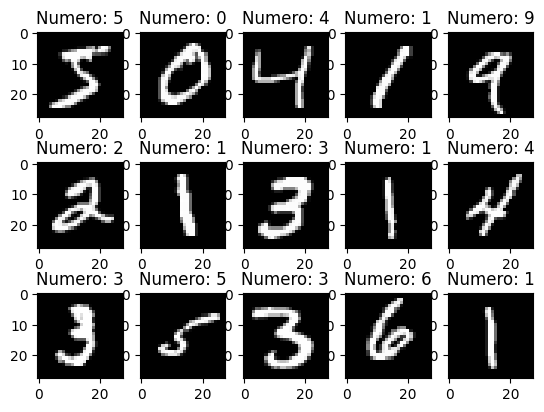

In [53]:
def label():
    nums = []
    for categ_num in y_train[0:15]: 
        for i, num in enumerate(categ_num):
            if num > 0:
                nums.append(i)
    return nums

fig = plt.figure()

for i in range(15):
    ax = fig.add_subplot(3, 5, i+1)
    image = plt.title(f"Numero: {list(label())[i]}")
    image = plt.imshow(X_train[i],"gray")

### Reshape

In [6]:
X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))
X_train, X_test = X_train/255.0, X_test/255.0
# cast
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

### Convert class vectors to binary class matrices

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

### Initialize the optimizer and model

In [8]:
model = build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 50)          25050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 50)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 500)               4

### Use TensorBoard, princess Aurora!

In [9]:
CALLBACKS = [
    # Write Tensorboard logs to './logs' directory
    tf.keras.callbacks.TensorBoard(log_dir='./logsMNIST')
]

### Fit

In [10]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT,callbacks=CALLBACKS)

score = model.evaluate(X_test,y_test, verbose=VERBOSE)
print("\nTest Score: ", score[0])
print("\nTest Accuraccy: ", score[1])

Epoch 1/20
24/24 [==============================] - 11s 437ms/step - loss: 1.1684 - accuracy: 0.6633 - val_loss: 0.4263 - val_accuracy: 0.8666
Epoch 2/20
24/24 [==============================] - 8s 346ms/step - loss: 0.3332 - accuracy: 0.8967 - val_loss: 0.2957 - val_accuracy: 0.9067
Epoch 3/20
24/24 [==============================] - 8s 353ms/step - loss: 0.2282 - accuracy: 0.9383 - val_loss: 0.2372 - val_accuracy: 0.9268
Epoch 4/20
24/24 [==============================] - 8s 325ms/step - loss: 0.1612 - accuracy: 0.9537 - val_loss: 0.1753 - val_accuracy: 0.9457
Epoch 5/20
24/24 [==============================] - 10s 431ms/step - loss: 0.1238 - accuracy: 0.9657 - val_loss: 0.1769 - val_accuracy: 0.9455
Epoch 6/20
24/24 [==============================] - 9s 400ms/step - loss: 0.0916 - accuracy: 0.9753 - val_loss: 0.1437 - val_accuracy: 0.9552
Epoch 7/20
24/24 [==============================] - 9s 375ms/step - loss: 0.0835 - accuracy: 0.9767 - val_loss: 0.1438 - val_accuracy: 0.9548
Epoc